In [ ]:
## Experiment performed by:
## Akshunn Garg 23/CS/042

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r, c = 3, 4
states = [(i, j) for i in range(3) for j in range (4) if (i, j) != (1, 1)]
actions = ['up', 'down', 'left', 'right']

def R(s):
    if s == (0, 3):
        return 1
    elif s == (1, 3):
        return -1
    else:
        return -0.04

def get_next_states(state, action):
    d = {"up": (-1, 0), "down": (1, 0), "left": (0, -1), "right": (0, 1)}
    next_states = []
    x, y = state
    for a in d.keys():
        nx, ny = x + d[a][0], y + d[a][1]
        
        if nx >= r or ny >= c or nx < 0 or ny < 0 or (nx, ny) not in states:
            nx, ny = x, y

        prob = 0.8 if a == action else 0.1
        next_states.append((prob, (nx, ny)))

    return next_states

In [3]:
def value_iteration(gamma=0.99, theta=0.0001, max_iter=None):
    V_list = []
    deltas = []
    V = {s: 0.0 for s in states}
    V[(0, 3)] = R((0, 3))
    V[(1, 3)] = R((1, 3))
    i = 0
    V_list.append(V)
    
    while True:
        delta = 0
        V_next = V.copy()
        
        for s in states:
            if s in [(0, 3), (1, 3)]:
                continue
            
            action_values = []
            for a in actions:
                v = 0
                for prob, s_next in get_next_states(s, a):
                    reward = R(s)
                    v += prob * (reward + gamma * V[s_next])
                action_values.append(v)

            V_next[s] = max(action_values)
            delta = max(delta, abs(V[s] - V_next[s]))
            
        V = V_next
        i += 1
        if max_iter is not None and  i > max_iter:
            break
        
        V_list.append(V.copy())
        deltas.append(delta)
        if delta < theta:
            print(f"Converged after {i} iterations.")
            break
        
    return V, V_list, deltas

In [4]:
def extract_policy(V, gamma=0.99):
    Pi = {}

    for s in states:
        if s in [(0, 3), (1, 3)]:
            continue
        
        action_values = {}
        for a in actions:
            q = 0
            for prob, s_next in get_next_states(s, a):
                q += prob * (R(s) + gamma * V[s_next])
            action_values[a] = q
            
        Pi[s] = max(action_values, key=action_values.get)

    return Pi

In [5]:
def visualize_value_function(V):
    grid = np.zeros((3, 4))
    for i in range(3):
        for j in range(4):
            if (i, j) == (1, 1):
                grid[i, j] = np.nan
            elif (i, j) in V:
                grid[i, j] = V[(i, j)]
            else:
                grid[i, j] = 0

    plt.figure(figsize=(6, 4))
    sns.heatmap(grid, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=1, linecolor='black')
    plt.title("Value Function (V)")
    # plt.gca().invert_yaxis()  # Make (0,0) top-left
    plt.show()

def visualize_policy(Pi):
    arrow_map = {"up": "↑", "down": "↓", "left": "←", "right": "→"}
    grid = np.empty((3, 4), dtype=object)
    
    for i in range(3):
        for j in range(4):
            if (i, j) == (1, 1):
                grid[i, j] = "W"
            elif (i, j) == (0, 3):
                grid[i, j] = "G"
            elif (i, j) == (1, 3):
                grid[i, j] = "P"
            elif (i, j) in Pi:
                grid[i, j] = arrow_map.get(Pi[(i, j)], "•")
            else:
                grid[i, j] = "•"

    print("\nPolicy Grid:")
    for row in grid:
        print(" ".join(row))

Converged after 8357 iterations.
{(0, 0): inf, (0, 1): inf, (0, 2): inf, (0, 3): 1, (1, 0): inf, (1, 2): inf, (1, 3): -1, (2, 0): inf, (2, 1): inf, (2, 2): inf, (2, 3): inf}


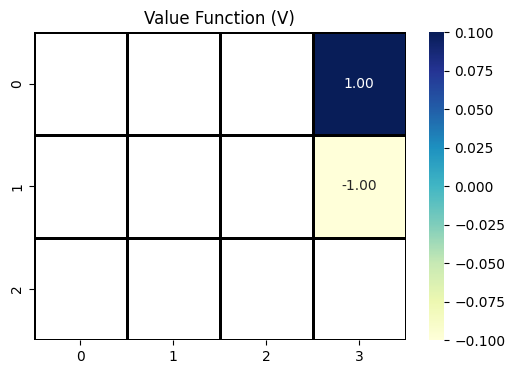


Policy Grid:
↑ ↑ ↑ G
↑ W ↑ P
↑ ↑ ↑ ↑


In [6]:
gamma = 0.99

V_final, _, deltas = value_iteration(gamma, theta=0.00001)
Pi_final = extract_policy(V_final, gamma)

print(V_final)
visualize_value_function(V_final)
visualize_policy(Pi_final)

# for v in _:
#     visualize_value_function(v)

/media/adiikj/Windows1/Users/Adity/OneDrive/Desktop/C++/ML Lab/.venv/lib/python3.12/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


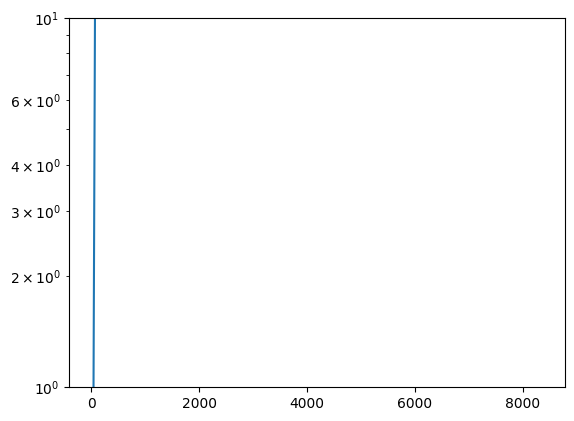

In [7]:
plt.plot(deltas)
plt.yscale('log')